**Dados:**

https://www.kaggle.com/yasserh/wine-quality-dataset

In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from plotly.express import parallel_coordinates
labels = {'fixed acidity':'fixed acid.', 'volatile acidity':'vola. acid.', 'free sulfur dioxide': 'free SO₂', 'total sulfur dioxide':'total SO₂', 'residual sugar':'res. sugar'}
colors = ["#F60000", "#FF8C00", "#FFEE00", "#4DE94C", "#3783FF", "#4815AA"]



In [98]:
df = pd.read_csv('D:\\Datasets/WineQT.csv')

In [99]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Removendo coluna desnecessária (Id)

In [100]:
df.drop('Id', axis = 1, inplace = True)

# Visualizando classes

<AxesSubplot: xlabel='quality', ylabel='count'>

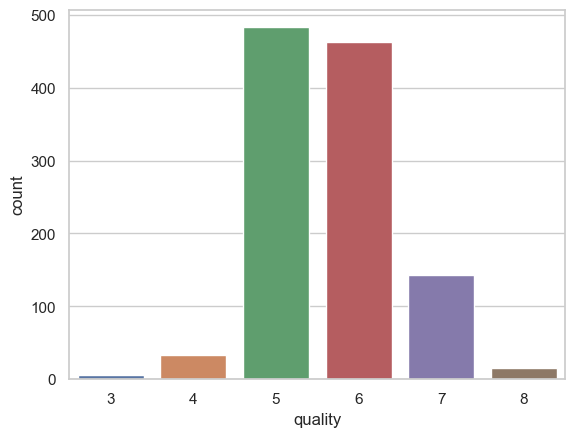

In [101]:
sns.countplot(x=df["quality"])

In [102]:
fig = parallel_coordinates(df, color="quality", labels=labels, color_continuous_scale=colors)
fig.show()

In [103]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Verificar se o dataset tem linhas duplicadas

In [104]:
df.duplicated().value_counts()

False    1018
True      125
dtype: int64

# Removendo linhas duplicadas

In [105]:
df.drop_duplicates(inplace = True)

# Separando em treino/teste

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis = 1), df['quality'], test_size=0.3)

In [107]:
display(X_train.shape, X_test.shape)

(712, 11)

(306, 11)

In [108]:
display(y_train.shape, y_test.shape)

(712,)

(306,)

# Normalizando os dados de entrada

In [109]:
scaler = MinMaxScaler()

In [110]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Criando classificador com k = 3

In [111]:
MODELO_KNN = KNeighborsClassifier(metric='manhattan', n_neighbors=3)

# Treinando o modelo

In [112]:
MODELO_KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [113]:
resultado = MODELO_KNN.predict(X_test)

In [114]:
resultado[:10]

array([5, 6, 6, 6, 6, 5, 3, 6, 7, 5], dtype=int64)

In [115]:
#contando acertos "manualmente"
z = zip(resultado, y_test)
acertos = 0
erros = 0
for a,b in z:
    if a==b:
        acertos+=1
    else:
        erros+=1
print(acertos)
print(erros)

136
170


# Verificando acurácia

In [116]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.59      0.54      0.56       135
           6       0.44      0.44      0.44       122
           7       0.28      0.26      0.27        35
           8       0.00      0.00      0.00         3

    accuracy                           0.44       306
   macro avg       0.22      0.21      0.21       306
weighted avg       0.47      0.44      0.46       306



In [117]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito   3   4    5    6   7  8  All
Real                                           
3                   0   0    0    2   0  0    2
4                   1   0    5    2   1  0    9
5                   9   6   73   42   5  0  135
6                   2   7   41   54  17  1  122
7                   0   1    5   20   9  0   35
8                   0   0    0    3   0  0    3
All                12  14  124  123  32  1  306


# Otimizando o parâmetro k com GridSearchCV

In [118]:
from sklearn.model_selection import GridSearchCV

# Definindo uma lista de valores a serem testados

In [119]:
k_list = list(range(1,50))

In [120]:
#transformando em dicionário
k_values = dict(n_neighbors=k_list)
#k_values

# Criando objeto GridSearchCV

In [121]:
grid = GridSearchCV(MODELO_KNN, k_values, cv=5, scoring='accuracy')

In [122]:
x = df.drop('quality', axis=1).values
y = df.quality.values

In [123]:
X = scaler.fit_transform(x)

# Treinando 

In [124]:
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

# Visualizando os valores de scores

In [125]:
grid.cv_results_

{'mean_fit_time': array([0.00119743, 0.00099816, 0.00059843, 0.00059834, 0.0009973 ,
        0.0007978 , 0.00099678, 0.00119753, 0.00099764, 0.00099759,
        0.00059838, 0.0007987 , 0.00099802, 0.00099792, 0.0009974 ,
        0.0009973 , 0.00099735, 0.00099888, 0.00099678, 0.00099697,
        0.00079803, 0.00079865, 0.00099745, 0.00059805, 0.00109782,
        0.00079803, 0.00079818, 0.00099778, 0.0007977 , 0.00059829,
        0.00079803, 0.00059872, 0.00079818, 0.00059838, 0.000699  ,
        0.00059853, 0.00099764, 0.00079803, 0.00099802, 0.00099707,
        0.00099745, 0.00059838, 0.0009974 , 0.00079827, 0.0009975 ,
        0.00079827, 0.00099778, 0.00099764, 0.00079761]),
 'std_fit_time': array([3.98827397e-04, 1.24891289e-06, 4.88616574e-04, 4.88538730e-04,
        5.43678010e-07, 3.98898192e-04, 6.30752100e-04, 3.98661456e-04,
        4.15696997e-07, 4.37028474e-07, 4.88579587e-04, 3.99352558e-04,
        1.32316942e-06, 8.60951905e-07, 6.30977238e-04, 1.36545382e-06,
        6

# Melhor valor de k

In [126]:
grid.best_params_

{'n_neighbors': 42}

# Melhor acurácia

In [127]:
grid.best_score_

0.5824929971988796

# Agora sabemos que com k = 21 temos 58% de acurácia

# Visualizando a escolha de k

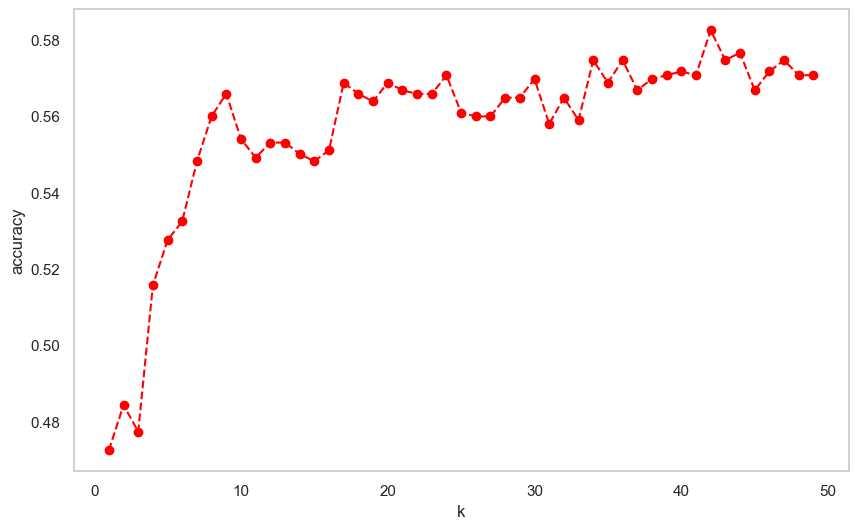

In [128]:
scores = grid.cv_results_['mean_test_score'].tolist()
# Renderizando gráfico
plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid()
plt.show()

# Estabilidade após K ~ 10.